<b><h2> CROP YIELD PREDICTION IN INDIA </h2></b>

Predicting yield helps the state to get an estimate of the crop in a
certain year to control the price rates.This model focuses on predicting the crop yield in advance by analyzing
factors like location, season, and crop type  through machine learning techniques on
previously collected datasets.

In [8]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# loading the dataset

crop_data=pd.read_csv("crop_production.csv")
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
220379,Uttar Pradesh,MAHARAJGANJ,2000.0,Rabi,Wheat,135820.0,391392.0
220380,Uttar Pradesh,MAHARAJGANJ,2000.0,Summer,Rice,179.0,450.0
220381,Uttar Pradesh,MAHARAJGANJ,2000.0,Whole Year,Potato,2886.0,40831.0
220382,Uttar Pradesh,MAHARAJGANJ,2000.0,Whole Year,Sugarcane,17444.0,829637.0


In [10]:
crop_data.shape

#rows X columns

(220384, 7)

In [11]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [12]:
# statistical inference of the dataset

crop_data.describe()

,Crop_Year,Area,Production
count,220383.000000,2.203830e+05,2.167830e+05
mean,2005.604793,1.170116e+04,6.383420e+05
std,4.936072,3.781905e+04,1.803895e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.400000e+01,9.300000e+01
50%,2006.000000,6.000000e+02,7.500000e+02
75%,2010.000000,4.490000e+03,7.081485e+03
max,2015.000000,1.020181e+06,1.250800e+09


In [13]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,1
Season,1
Crop,1
Area,1
Production,3601


In [14]:
# Dropping missing values
crop_data = crop_data.dropna()
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
220378,Uttar Pradesh,MAHARAJGANJ,2000.0,Rabi,Urad,72.0,33.0
220379,Uttar Pradesh,MAHARAJGANJ,2000.0,Rabi,Wheat,135820.0,391392.0
220380,Uttar Pradesh,MAHARAJGANJ,2000.0,Summer,Rice,179.0,450.0
220381,Uttar Pradesh,MAHARAJGANJ,2000.0,Whole Year,Potato,2886.0,40831.0


In [15]:
#checking
crop_data.isnull().values.any()


np.False_

In [16]:
# Displaying State Names present in the dataset
crop_data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh'], dtype=object)

In [17]:
# Filtering only Kerala data
kerala_data = crop_data[crop_data['State_Name'] == 'Kerala']
print("Kerala dataset shape:", kerala_data.shape)
kerala_data.head()


Kerala dataset shape: (4003, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
97987,Kerala,ALAPPUZHA,1997.0,Whole Year,Arecanut,2253.0,1518.0
97988,Kerala,ALAPPUZHA,1997.0,Whole Year,Black pepper,2235.0,248.0
97989,Kerala,ALAPPUZHA,1997.0,Whole Year,Cashewnut,7205.0,2358.0
97990,Kerala,ALAPPUZHA,1997.0,Whole Year,Coconut,77893.0,399000.0
97991,Kerala,ALAPPUZHA,1997.0,Whole Year,Tapioca,3911.0,74110.0


In [18]:
# Adding a new column Yield which indicates Production per unit Area.

kerala_data['Yield'] = (kerala_data['Production'] / kerala_data['Area'])
kerala_data.head(10)

/tmp/ipython-input-2456002815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kerala_data['Yield'] = (kerala_data['Production'] / kerala_data['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
97987,Kerala,ALAPPUZHA,1997.0,Whole Year,Arecanut,2253.0,1518.0,0.673768
97988,Kerala,ALAPPUZHA,1997.0,Whole Year,Black pepper,2235.0,248.0,0.110962
97989,Kerala,ALAPPUZHA,1997.0,Whole Year,Cashewnut,7205.0,2358.0,0.327273
97990,Kerala,ALAPPUZHA,1997.0,Whole Year,Coconut,77893.0,399000.0,5.122412
97991,Kerala,ALAPPUZHA,1997.0,Whole Year,Tapioca,3911.0,74110.0,18.949118
97992,Kerala,ALAPPUZHA,1998.0,Autumn,Rice,8719.0,17570.0,2.015139
97993,Kerala,ALAPPUZHA,1998.0,Kharif,Sesamum,1150.0,140.0,0.121739
97994,Kerala,ALAPPUZHA,1998.0,Summer,Rice,19058.0,58013.0,3.044024
97995,Kerala,ALAPPUZHA,1998.0,Whole Year,Arecanut,2067.0,766.0,0.370585
97996,Kerala,ALAPPUZHA,1998.0,Whole Year,Banana,324.0,4493.0,13.867284


/tmp/ipython-input-2973845207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_yield, x="District_Name", y="Yield", palette="viridis")


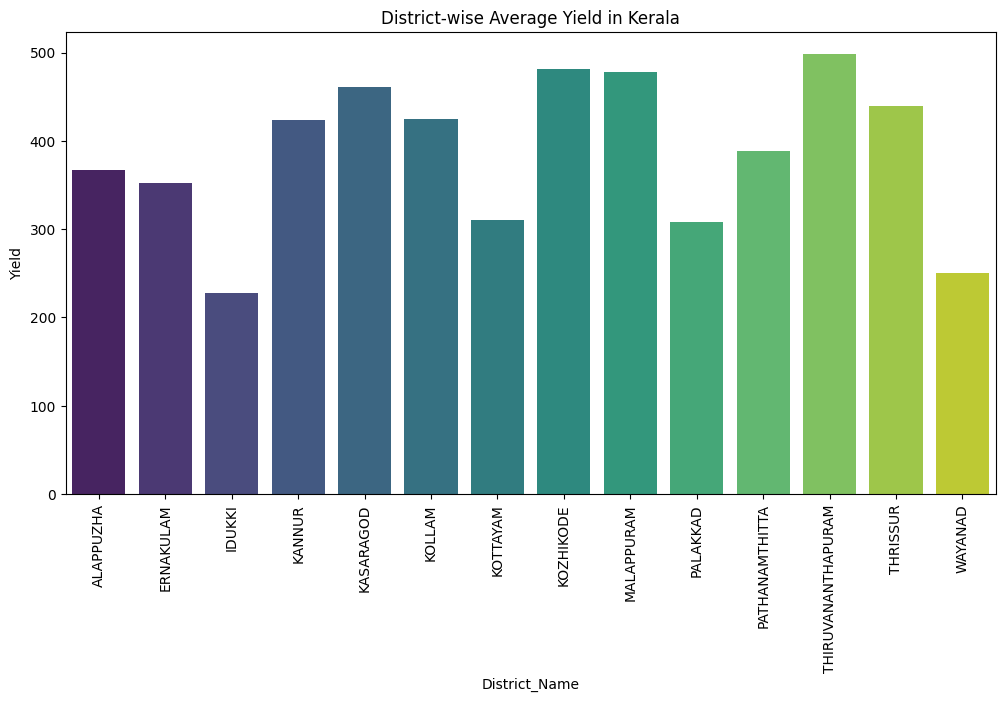

In [19]:
# District-wise average yield in Kerala
district_yield = kerala_data.groupby("District_Name")["Yield"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=district_yield, x="District_Name", y="Yield", palette="viridis")
plt.xticks(rotation=90)
plt.title("District-wise Average Yield in Kerala")
plt.show()


**Pairplot and Correlation**
Pairplot: many mini-scatterplots that show how each pair of numbers relate.


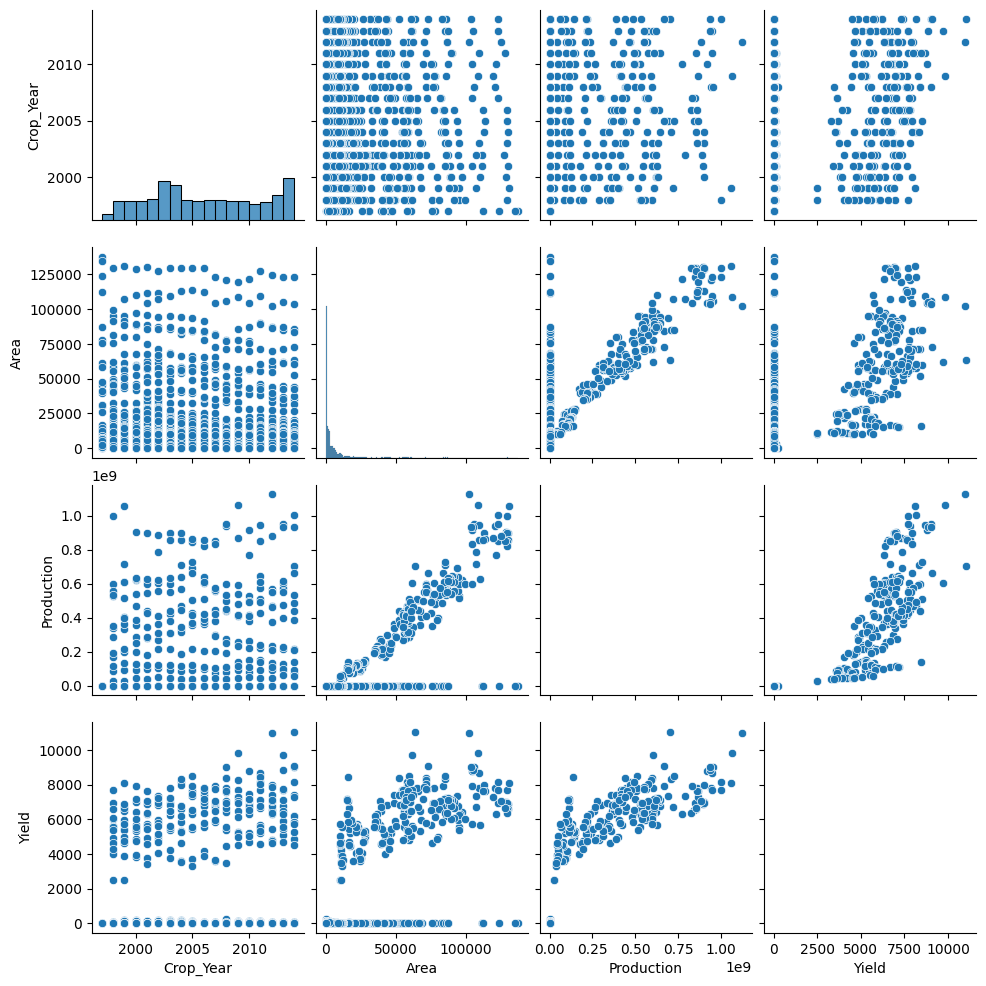

In [20]:
data = kerala_data.drop(['State_Name'], axis=1)
ax = sns.pairplot(kerala_data)
ax

In [21]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
display(correlation_matrix)

,Crop_Year,Area,Production,Yield
Crop_Year,1.000000,-0.057203,0.022179,0.039401
Area,-0.057203,1.000000,0.835687,0.762559
Production,0.022179,0.835687,1.000000,0.904577
Yield,0.039401,0.762559,0.904577,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

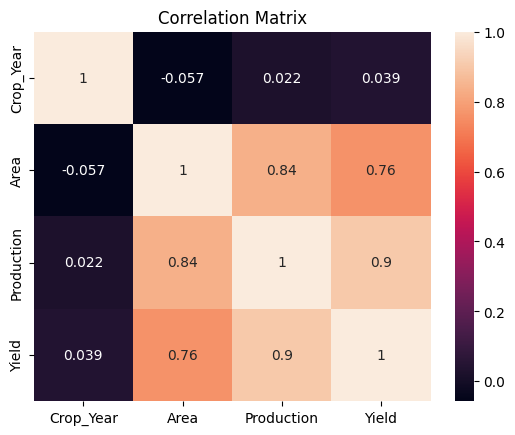

In [22]:
sns.heatmap(numeric_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [23]:
dummy = pd.get_dummies(data)
dummy


,Crop_Year,Area,Production,Yield,District_Name_ALAPPUZHA,District_Name_ERNAKULAM,District_Name_IDUKKI,District_Name_KANNUR,District_Name_KASARAGOD,District_Name_KOLLAM,...,Crop_Snak Guard,Crop_Soyabean,Crop_Sugarcane,Crop_Sweet potato,Crop_Tapioca,Crop_Tea,Crop_Tobacco,Crop_Turmeric,Crop_Wheat,Crop_other oilseeds
97987,1997.0,2253.0,1518.00,0.673768,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97988,1997.0,2235.0,248.00,0.110962,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97989,1997.0,7205.0,2358.00,0.327273,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97990,1997.0,77893.0,399000.00,5.122412,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97991,1997.0,3911.0,74110.00,18.949118,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102242,2014.0,1.0,0.45,0.450000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
102244,2014.0,8.0,127.00,15.875000,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
102245,2014.0,2327.0,99788.00,42.882682,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
102246,2014.0,161.0,481.00,2.987578,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


<b><i> Splitting dataset into train and test dataset </i></b>

In [24]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (3002, 64)
x_test : (1001, 64)
y_train : (3002,)
y_test : (1001,)


In [25]:
print(x_train)
print(y_train)

        Crop_Year     Area  District_Name_ALAPPUZHA  District_Name_ERNAKULAM  \
98206      2011.0   724.76                     True                    False   
99757      2011.0    54.59                    False                    False   
99545      1998.0  5180.00                    False                    False   
100393     2014.0    43.00                    False                    False   
99542      1998.0  1941.00                    False                    False   
...           ...      ...                      ...                      ...   
101386     1997.0  2839.00                    False                    False   
101234     2005.0   955.00                    False                    False   
99840      1998.0  1813.00                    False                    False   
100402     1997.0  7010.00                    False                    False   
101100     1997.0  4420.00                    False                    False   

        District_Name_IDUKKI  District_

<b><h3> Linear Regression </b></h3>

In [26]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
# Predicting the test Results

lr_predict = model.predict(x_test)
lr_predict

array([ 2.31343222e+08, -4.55343289e+06, -1.07214751e+07, ...,
        1.26635438e+06, -8.36741345e+06,  2.93042390e+06])

In [28]:
model.score(x_test,y_test)

0.7246826338476369

In [29]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.7246826338476369


Text(0.5, 1.0, 'Linear Regression')

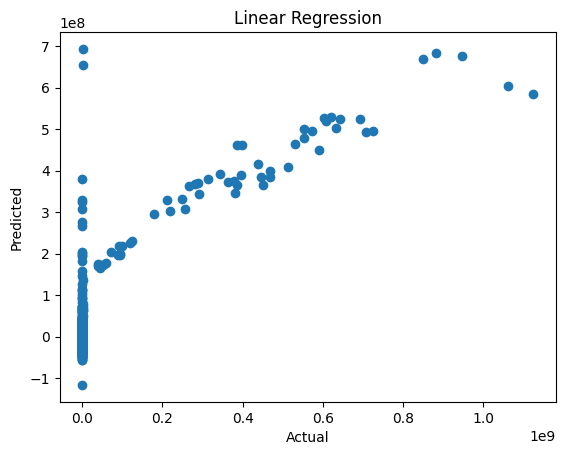

In [30]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.

<b> Assumptions of Linear Regression </b>
<ol>
    <li> Linearity.</li>
    <li> Homoscedasticity </li>
    <li> Multivariate normality </li>
    <li> Lack of multicollinearity </li>
    


# R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination.
# This tells us how well the unknown sam **bold text**ples will be predicted by our model.

<b><h3> Random Forest Algorithm </h3></b>

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([1.27090909e+08, 3.26325091e+03, 1.60908455e+04, ...,
       3.74181818e+02, 1.80490273e+04, 1.10363636e+02])

In [32]:
model.score(x_test,y_test)

0.9540541864523873

In [33]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9540541864523873


In [34]:
# Calculating Adj. R2 score:

Adjr2_1 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.7058575147944839


/tmp/ipython-input-551929062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
/tmp/ipython-input-551929062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_predict, hist = False, color = "b", label = "Pre

Text(0.5, 1.0, 'Random Forest Regression')

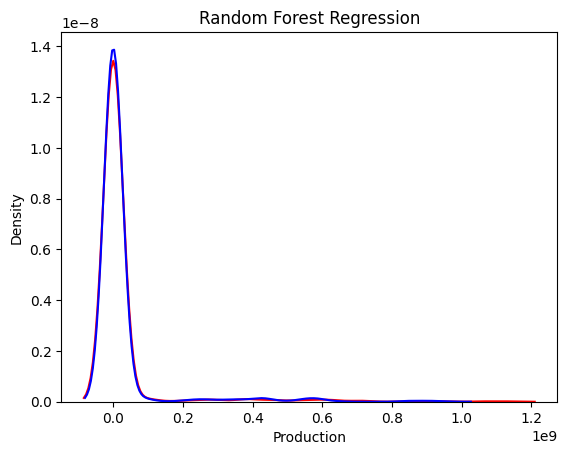

In [35]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

*District-level predicted yields*

In [36]:
district_pred = kerala_data.copy()

# Predict production first
pred_production = model.predict(dummy.drop(["Production","Yield"], axis=1))

# Convert predicted production to predicted yield
district_pred["Predicted_Yield"] = pred_production / district_pred["Area"]

In [37]:
# Group by district for averages
district_pred_grouped = district_pred.groupby("District_Name")[["Yield","Predicted_Yield"]].mean().reset_index()

/tmp/ipython-input-1259637920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_pred_grouped, x="District_Name", y="Predicted_Yield", palette="coolwarm")


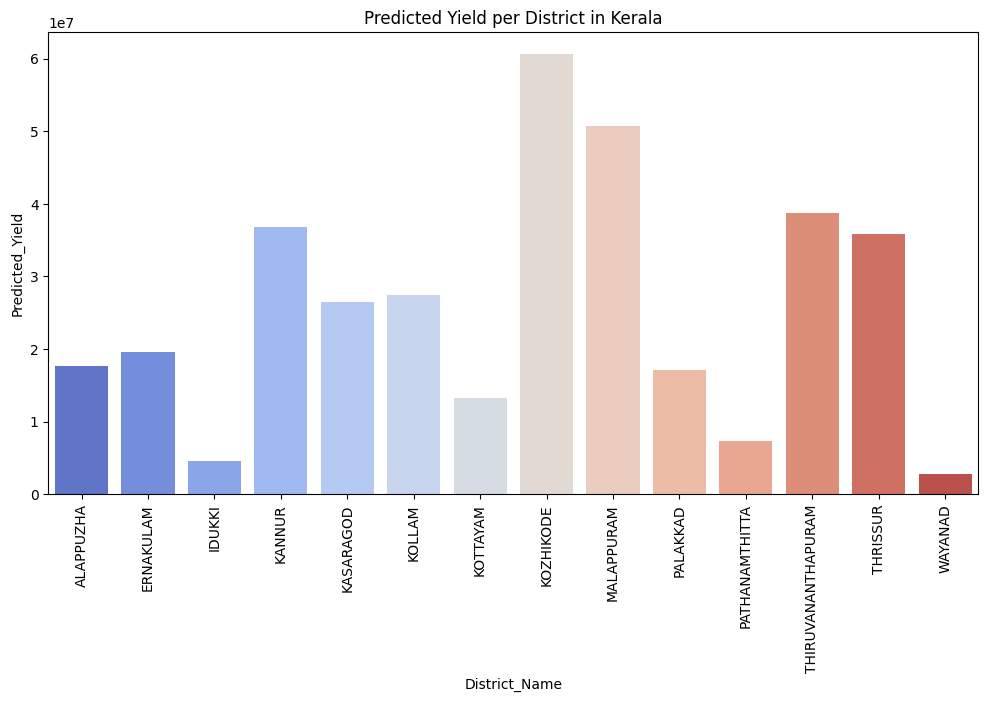

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(data=district_pred_grouped, x="District_Name", y="Predicted_Yield", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Predicted Yield per District in Kerala")
plt.show()

In [39]:
print(district_pred_grouped.head())

  District_Name       Yield  Predicted_Yield
0     ALAPPUZHA  367.237671     1.764695e+07
1     ERNAKULAM  352.175588     1.956820e+07
2        IDUKKI  227.964020     4.574849e+06
3        KANNUR  423.676046     3.680775e+07
4     KASARAGOD  461.168581     2.641281e+07


In [40]:
print(district_pred_grouped)


         District_Name       Yield  Predicted_Yield
0            ALAPPUZHA  367.237671     1.764695e+07
1            ERNAKULAM  352.175588     1.956820e+07
2               IDUKKI  227.964020     4.574849e+06
3               KANNUR  423.676046     3.680775e+07
4            KASARAGOD  461.168581     2.641281e+07
5               KOLLAM  424.845678     2.742892e+07
6             KOTTAYAM  310.527104     1.319646e+07
7            KOZHIKODE  481.752362     6.064280e+07
8           MALAPPURAM  477.639879     5.070533e+07
9             PALAKKAD  308.588869     1.714024e+07
10      PATHANAMTHITTA  388.472960     7.264952e+06
11  THIRUVANANTHAPURAM  498.287170     3.875615e+07
12            THRISSUR  439.863686     3.585253e+07
13             WAYANAD  249.837282     2.719126e+06


<b> Comparison between Linear Regression Algorithm and Random Forest Algorithm </b>



1. Linear regression algorithm is not at all accurate for this kind of prediction.
2. Random Forest Algorithm has higher accuracy ( between 85 % to 90% ), but it is slow.

<b> Support Vector Regression </b>

In [41]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
print(x_train)
print(x_test)

[[ 1.10388756 -0.39467034  3.60943727 ... -0.25030954 -0.01825438
  -0.05483627]
 [ 1.10388756 -0.43103258 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-1.5403744  -0.15293689 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 ...
 [-1.5403744  -0.33562436 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-1.74377917 -0.05364432 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-1.74377917 -0.19417315 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]]
[[-0.9301601   0.79745034 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [ 0.29026849 -0.36188535 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-0.72675534 -0.32249387 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 ...
 [ 0.69707803 -0.42515045 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-0.52335057 -0.3068675  -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-0.52335057 -0.38451103 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]]


In [43]:
# Training the SVR model

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [44]:
# Predicting Result

svr_predict = regressor.predict(x_test)
svr_predict

array([1732.03129937, 1695.7622883 , 1724.29205863, ..., 1690.23393479,
       1724.46531701, 1615.3841264 ])

/tmp/ipython-input-2646629236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
/tmp/ipython-input-2646629236.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(svr_predict, hist = False, color = "b", label = "

Text(0.5, 1.0, 'Support Vector Regression')

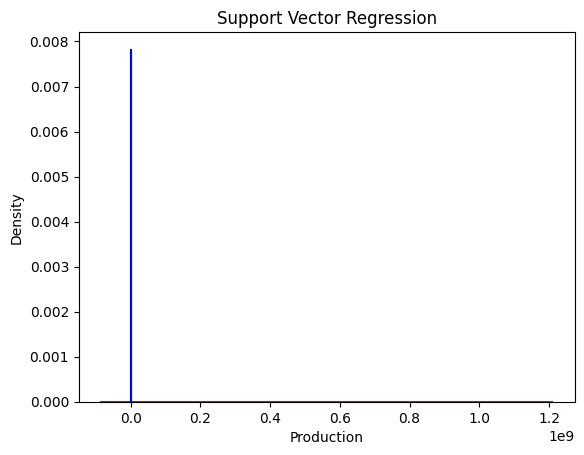

In [45]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(svr_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Support Vector Regression')

<b> Decision Tree </b>

In [46]:
# Training model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([1.3100e+08, 2.4990e+03, 1.5173e+04, ..., 3.2600e+02, 1.8872e+04,
       0.0000e+00])

In [47]:
regressor.score(x_test,y_test)

0.9736912872719188

In [48]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9736912872719188


In [49]:
# Calculating Adj. R2 score:

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.7058575147944839


/tmp/ipython-input-697514152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
/tmp/ipython-input-697514152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(decisiontree_predict, hist = False, color = "b", la

Text(0.5, 1.0, 'Decision Tree Regression')

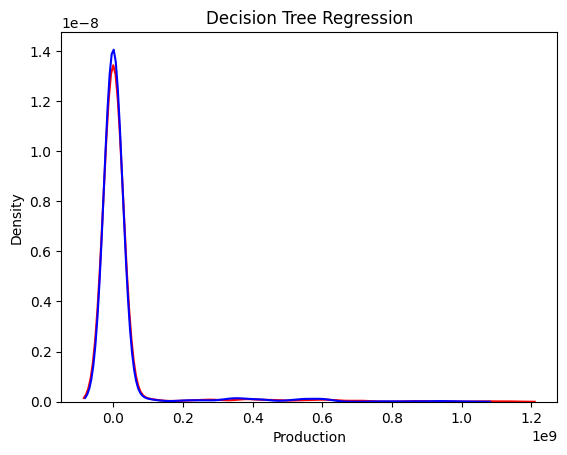

In [50]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

<b> Cross-validation </b>

In [51]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y=y_train, cv = 10)

In [52]:
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)

In [53]:

# Mean Accuracy and SD of 10 fold results

print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 94.46%
Standard Deviation : 7.49%


<b> Cross-validation </b>

In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train)

In [55]:
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)

In [56]:
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 94.62%
Standard Deviation : 4.53%


**Comparing models**

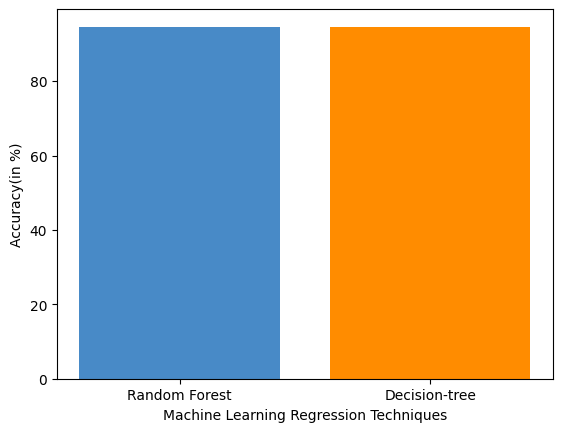

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

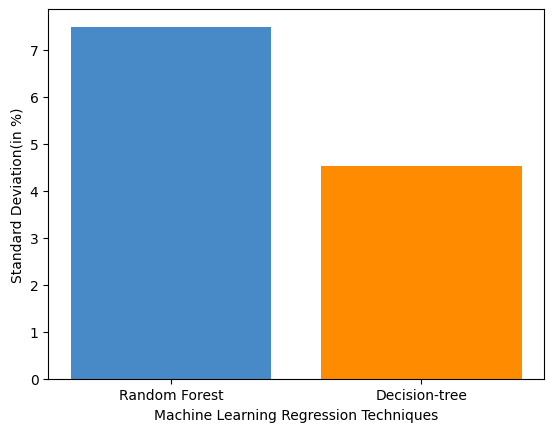

<Figure size 640x480 with 0 Axes>

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [b1, b2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

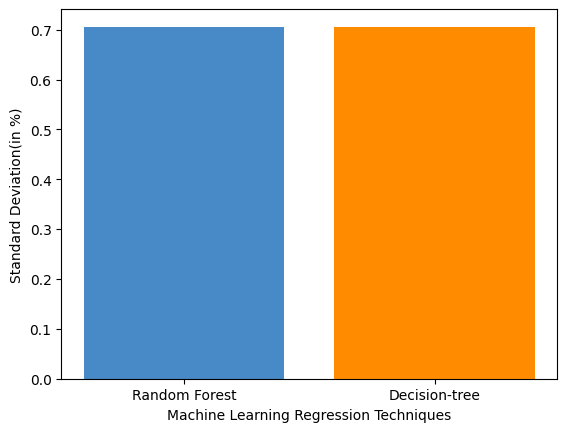

<Figure size 640x480 with 0 Axes>

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

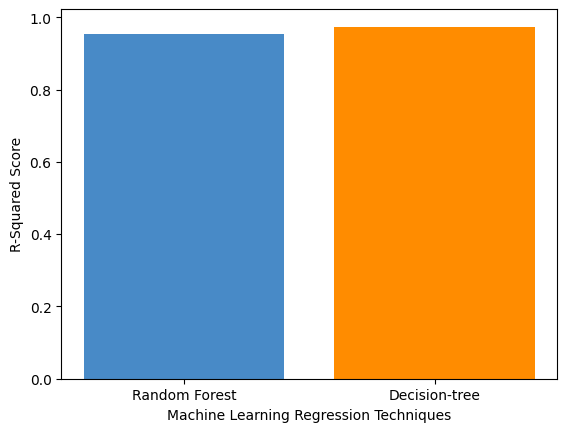

<Figure size 640x480 with 0 Axes>

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [r1, r2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

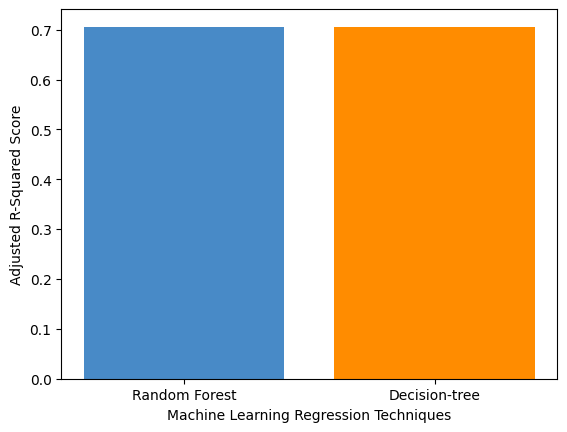

<Figure size 640x480 with 0 Axes>

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Adjusted R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

In [62]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, rf_predict)

In [63]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(rf_predict,y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))

Mean Absolute Error: 3396045.9169703024
Mean Squared Error: 574629362620666.0
Root Mean Squared Error: 23971428.047170363


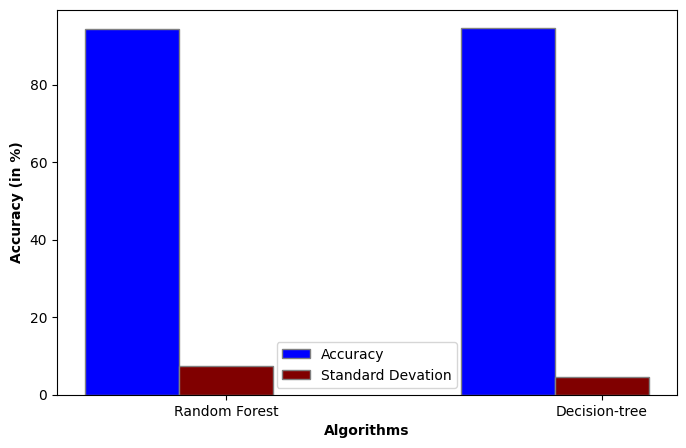

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))

# set height of bar
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]
Standard_Deviation = [b1,b2]

# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Accuracy, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Standard_Deviation, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Standard Devation')

# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy (in %)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        Algorithms)

plt.legend()
plt.show()

<b> Hyperparameter Tuning using GridSearchCV </b>

Random Forest Regression

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# defining parameter range
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

reg = GridSearchCV(DecisionTreeRegressor(random_state=5), param_grid, refit = True, verbose = 3,n_jobs=-1)

reg.fit(x_train,y_train)
reg.cv_results_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'mean_fit_time': array([0.03886251, 0.03301525, 0.02928681, 0.033289  , 0.03134408,
        0.02881131, 0.02673197, 0.02658076, 0.02605257, 0.02398343,
        0.01879444, 0.0213089 , 0.01878805, 0.01830335, 0.01857705,
        0.0182023 , 0.01785121, 0.01785269, 0.03240547, 0.0283215 ,
        0.02684865, 0.0279501 , 0.02857656, 0.02663674, 0.0256    ,
        0.03306346, 0.02758908, 0.03785167, 0.03247323, 0.02827244,
        0.03061028, 0.03064098, 0.03045077, 0.02873492, 0.02707968,
        0.02652583]),
 'std_fit_time': array([0.00107174, 0.00124051, 0.00078075, 0.00233708, 0.0009377 ,
        0.00100355, 0.00087643, 0.0010052 , 0.00152666, 0.00414919,
        0.00060504, 0.0036396 , 0.00064776, 0.00016339, 0.00165711,
        0.00056593, 0.0002517 , 0.00072506, 0.0016343 , 0.00034898,
        0.00122643, 0.00027748, 0.00178029, 0.00098339, 0.00051492,
        0.00734171, 0.00350902, 0.00200258, 0.00241611, 0.00080805,
        0.00098153, 0.00102805, 0.00437831, 0.00349031, 0.001

In [66]:
# CV results are not easy to use,
# sklearn provides a way to download these results into a dataframe
df = pd.DataFrame(reg.cv_results_)
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038863,0.001072,0.001966,0.000173,None,1,2,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.982416,0.989388,0.875743,0.973949,0.909260,0.946151,0.045333,2
1,0.033015,0.001241,0.001747,0.000030,None,1,5,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.843723,0.985225,0.904717,0.972694,0.897304,0.920733,0.052144,15
2,0.029287,0.000781,0.001722,0.000044,None,1,10,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.984961,0.985371,0.870494,0.968808,0.877046,0.937336,0.052285,5
3,0.033289,0.002337,0.001808,0.000095,None,2,2,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.950567,0.986370,0.819348,0.976917,0.846411,0.915923,0.069342,26
4,0.031344,0.000938,0.001747,0.000058,None,2,5,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.950940,0.986251,0.819843,0.972492,0.845714,0.915048,0.068599,27
5,0.028811,0.001004,0.001704,0.000050,None,2,10,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.949682,0.986240,0.871399,0.971635,0.877680,0.931327,0.047847,9
6,0.026732,0.000876,0.001736,0.000051,None,4,2,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.913620,0.957627,0.844123,0.972207,0.893806,0.916277,0.045948,19
7,0.026581,0.001005,0.001757,0.000123,None,4,5,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.913620,0.957627,0.844123,0.972207,0.893806,0.916277,0.045948,19
8,0.026053,0.001527,0.001801,0.000089,None,4,10,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.913879,0.954704,0.835051,0.967547,0.893634,0.912963,0.047258,32
9,0.023983,0.004149,0.001747,0.000095,10,1,2,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.832203,0.988725,0.874626,0.977417,0.909494,0.916493,0.059726,18


In [67]:
df[['param_max_depth','param_min_samples_split','param_min_samples_leaf','mean_test_score']]

,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score
0,None,2,1,0.946151
1,None,5,1,0.920733
2,None,10,1,0.937336
3,None,2,2,0.915923
4,None,5,2,0.915048
5,None,10,2,0.931327
6,None,2,4,0.916277
7,None,5,4,0.916277
8,None,10,4,0.912963
9,10,2,1,0.916493


In [68]:
reg.best_score_

np.float64(0.9499635154581798)

In [69]:
reg.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [70]:
# To tackle the computation problem in gridsearch ,
# randomizedsearchcv comes in. Randomly tries value.

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

# Define the parameter distribution for DecisionTreeRegressor
param_distributions = {
    'max_depth': randint(1, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize RandomizedSearchCV with the DecisionTreeRegressor object
rs = RandomizedSearchCV(DecisionTreeRegressor(random_state=5),
                        param_distributions,
                        cv=5,
                        return_train_score=False,
                        n_iter=10,  # Reduced n_iter for faster execution
                        n_jobs=-1)

rs.fit(x_train, y_train)

# Display the results
df_rs = pd.DataFrame(rs.cv_results_)
display(df_rs[['param_max_depth','param_min_samples_split','param_min_samples_leaf','mean_test_score']])

,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score
0,6,5,9,0.905367
1,11,15,7,0.904232
2,14,17,9,0.905193
3,16,6,5,0.913462
4,7,18,9,0.905193
5,7,13,1,0.908325
6,7,11,6,0.918473
7,29,9,2,0.932765
8,25,7,8,0.903179
9,15,6,2,0.921057
